Summary Statistics:
             Volume  Quarterly Close Price  Revenue_Billions
count  8.000000e+00               8.000000          8.000000
mean   1.676281e+08              34.966250         26.585125
std    2.611276e+07               2.652072          0.469005
min    1.349159e+08              30.710000         25.846000
25%    1.563601e+08              33.285000         26.270250
50%    1.644707e+08              35.305000         26.601000
75%    1.681267e+08              36.920000         26.970750
max    2.258875e+08              38.670000         27.161000

Correlation Analysis:
                         Volume  Quarterly Close Price  Quarterly Revenue
Volume                 1.000000              -0.813551          -0.543164
Quarterly Close Price -0.813551               1.000000           0.535804
Quarterly Revenue     -0.543164               0.535804           1.000000


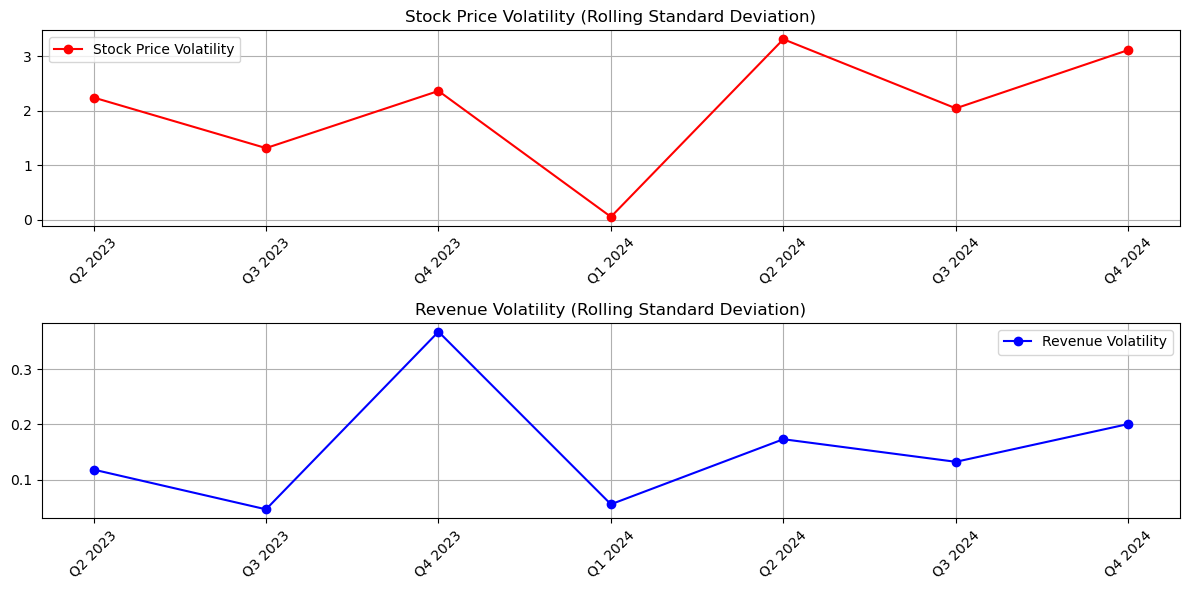


Model Evaluation:
Revenue Prediction R² Score: 0.8722
Stock Price Prediction R² Score: 0.4649


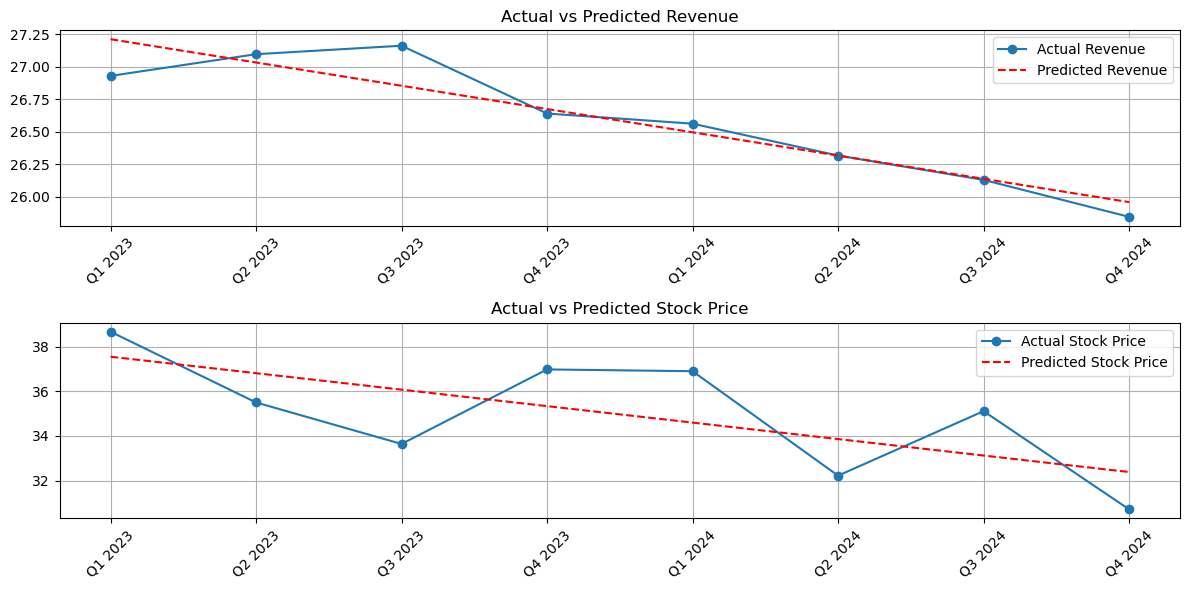


AI-Generated Strategic Suggestions:
Revenue has been declining. Consider expanding product lines or cost-cutting strategies.
Stock price is on a downward trend. Investigate investor sentiment and earnings reports.



In [2]:
import pandas as pd  # Data handling
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Enhanced visualizations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # Model evaluation
from langchain.chat_models import ChatOpenAI  # AI-driven analysis
from langchain.tools import Tool
from langchain.agents import initialize_agent, AgentType
import os

# --------------------------- STEP 1: Load and Clean Data --------------------------- #

def load_and_clean_data(file_path):
    """Loads and preprocesses the Kraft Heinz dataset."""
    df = pd.read_csv(file_path)

    # Convert numeric values (remove commas and convert to float)
    df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
    df['Quarterly Close Price'] = df['Quarterly Close Price'].astype(float)
    df['Quarterly Revenue'] = df['Quarterly Revenue'].str.replace(',', '').astype(float)

    # Create additional features for deeper analysis
    df['Revenue_Billions'] = df['Quarterly Revenue'] / 1_000_000_000  # Convert revenue to billions
    df['Quarter_Num'] = range(1, len(df) + 1)  # Assign a numeric index to each quarter
    df['Revenue_QoQ_Change'] = df['Quarterly Revenue'].pct_change() * 100  # Revenue growth (%)
    df['Price_QoQ_Change'] = df['Quarterly Close Price'].pct_change() * 100  # Stock price change (%)
    df['Volume_QoQ_Change'] = df['Volume'].pct_change() * 100  # Volume change (%)
    df['PS_Ratio'] = (df['Quarterly Close Price'] * 1_000_000_000) / df['Quarterly Revenue']  # Price-to-sales ratio

    return df

# --------------------------- STEP 2: Statistical & Correlation Analysis --------------------------- #

def summary_statistics(df):
    """Returns summary statistics for key metrics."""
    return df[['Volume', 'Quarterly Close Price', 'Revenue_Billions']].describe()

def correlation_analysis(df):
    """Computes the correlation matrix between key financial metrics."""
    return df[['Volume', 'Quarterly Close Price', 'Quarterly Revenue']].corr()

# --------------------------- STEP 3: Volatility Analysis --------------------------- #

def volatility_analysis(df):
    """Computes rolling standard deviation for stock price and revenue."""
    df['Stock_Volatility'] = df['Quarterly Close Price'].rolling(window=2).std()
    df['Revenue_Volatility'] = df['Revenue_Billions'].rolling(window=2).std()
    
    # Plot Volatility
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(df['Quarter'], df['Stock_Volatility'], marker='o', color='red', label="Stock Price Volatility")
    plt.title("Stock Price Volatility (Rolling Standard Deviation)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(df['Quarter'], df['Revenue_Volatility'], marker='o', color='blue', label="Revenue Volatility")
    plt.title("Revenue Volatility (Rolling Standard Deviation)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# --------------------------- STEP 4: Predictive Modeling & Validation --------------------------- #

def predict_future_trends(df):
    """Predicts future revenue and stock price using linear regression & evaluates model performance."""
    
    X = df[['Quarter_Num']]
    
    # Predicting Revenue
    y_revenue = df['Revenue_Billions']
    revenue_model = LinearRegression()
    revenue_model.fit(X, y_revenue)
    df['Predicted_Revenue'] = revenue_model.predict(X)

    # Predicting Stock Price
    y_price = df['Quarterly Close Price']
    price_model = LinearRegression()
    price_model.fit(X, y_price)
    df['Predicted_Stock_Price'] = price_model.predict(X)

    # Model Performance Evaluation
    revenue_r2 = r2_score(y_revenue, df['Predicted_Revenue'])
    price_r2 = r2_score(y_price, df['Predicted_Stock_Price'])
    print(f"\nModel Evaluation:\nRevenue Prediction R² Score: {revenue_r2:.4f}")
    print(f"Stock Price Prediction R² Score: {price_r2:.4f}")

    # Plot Predictions
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(df['Quarter'], df['Revenue_Billions'], marker='o', label="Actual Revenue")
    plt.plot(df['Quarter'], df['Predicted_Revenue'], linestyle="dashed", color="red", label="Predicted Revenue")
    plt.title("Actual vs Predicted Revenue")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(df['Quarter'], df['Quarterly Close Price'], marker='o', label="Actual Stock Price")
    plt.plot(df['Quarter'], df['Predicted_Stock_Price'], linestyle="dashed", color="red", label="Predicted Stock Price")
    plt.title("Actual vs Predicted Stock Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

    return df

# --------------------------- STEP 5: AI-Powered Financial Insights --------------------------- #

def generate_suggestions(df):
    """Generates AI-driven insights based on revenue, stock price, and volume changes."""
    insights = ""
    if df['Revenue_QoQ_Change'].mean() < 0:
        insights += "Revenue has been declining. Consider expanding product lines or cost-cutting strategies.\n"
    if df['Price_QoQ_Change'].mean() < 0:
        insights += "Stock price is on a downward trend. Investigate investor sentiment and earnings reports.\n"
    if df['Volume_QoQ_Change'].mean() > 10:
        insights += "Trading volume is volatile. Investigate potential external market influences.\n"
    return insights if insights else "No significant concerns detected."

# --------------------------- STEP 6: Main Execution --------------------------- #

if __name__ == "__main__":
    file_path = "C:\\Users\\sapna\\OneDrive - The University of Colorado Denver\\Spring 2025\\Academics\\Computing\\Final Project\\Group_Project_Data_Set.csv"
    df = load_and_clean_data(file_path)

    # Perform analysis
    print("Summary Statistics:")
    print(summary_statistics(df))
    print("\nCorrelation Analysis:")
    print(correlation_analysis(df))

    # Compute volatility
    volatility_analysis(df)

    # Predict future trends & validate model
    df = predict_future_trends(df)

    # Generate AI-driven insights
    suggestions = generate_suggestions(df)
    print("\nAI-Generated Strategic Suggestions:")
    print(suggestions)


Summary Statistics:
             Volume  Quarterly Close Price  Revenue_Billions
count  8.000000e+00               8.000000          8.000000
mean   1.676281e+08              34.966250         26.585125
std    2.611276e+07               2.652072          0.469005
min    1.349159e+08              30.710000         25.846000
25%    1.563601e+08              33.285000         26.270250
50%    1.644707e+08              35.305000         26.601000
75%    1.681267e+08              36.920000         26.970750
max    2.258875e+08              38.670000         27.161000

Correlation Analysis:
                         Volume  Quarterly Close Price  Quarterly Revenue
Volume                 1.000000              -0.813551          -0.543164
Quarterly Close Price -0.813551               1.000000           0.535804
Quarterly Revenue     -0.543164               0.535804           1.000000


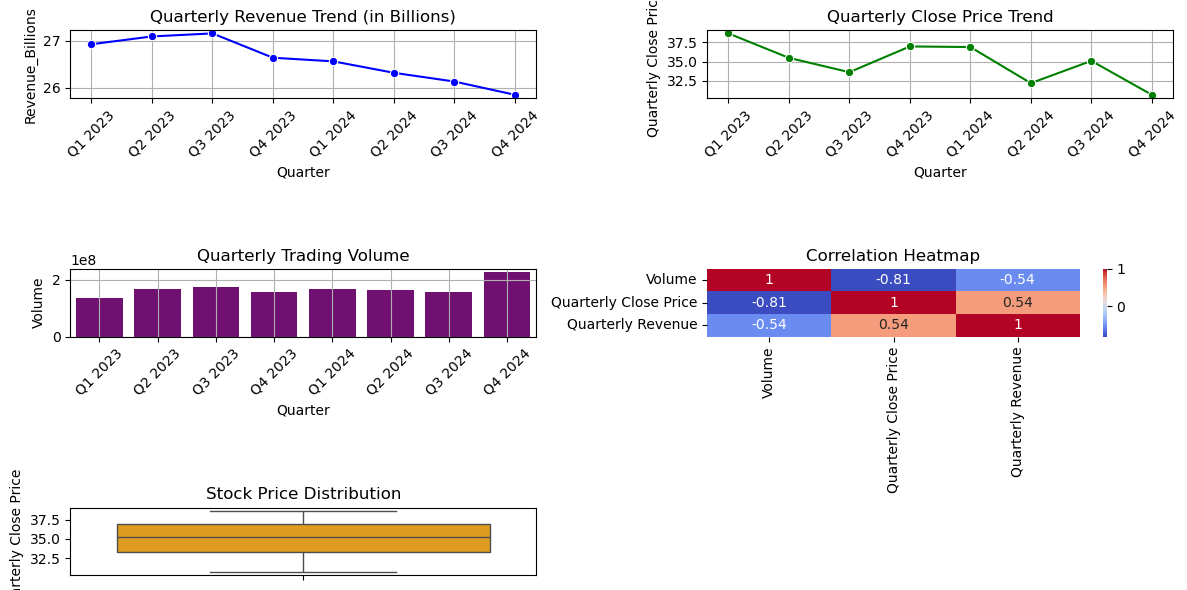


Model Evaluation:
Revenue Prediction R² Score: 0.8722
Stock Price Prediction R² Score: 0.4649

AI-Generated Strategic Suggestions:
Revenue has been declining. Consider expanding product lines or cost-cutting strategies.
Stock price is on a downward trend. Investigate investor sentiment and earnings reports.



In [3]:
import pandas as pd  # Data handling
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Enhanced visualizations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # Model evaluation
from langchain.chat_models import ChatOpenAI  # AI-driven analysis
from langchain.tools import Tool
from langchain.agents import initialize_agent, AgentType
import os

# --------------------------- STEP 1: Load and Clean Data --------------------------- #

def load_and_clean_data(file_path):
    """Loads and preprocesses the Kraft Heinz dataset."""
    df = pd.read_csv(file_path)

    # Convert numeric values (remove commas and convert to float)
    df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
    df['Quarterly Close Price'] = df['Quarterly Close Price'].astype(float)
    df['Quarterly Revenue'] = df['Quarterly Revenue'].str.replace(',', '').astype(float)

    # Create additional features for deeper analysis
    df['Revenue_Billions'] = df['Quarterly Revenue'] / 1_000_000_000  # Convert revenue to billions
    df['Quarter_Num'] = range(1, len(df) + 1)  # Assign a numeric index to each quarter
    df['Revenue_QoQ_Change'] = df['Quarterly Revenue'].pct_change() * 100  # Revenue growth (%)
    df['Price_QoQ_Change'] = df['Quarterly Close Price'].pct_change() * 100  # Stock price change (%)
    df['Volume_QoQ_Change'] = df['Volume'].pct_change() * 100  # Volume change (%)
    df['PS_Ratio'] = (df['Quarterly Close Price'] * 1_000_000_000) / df['Quarterly Revenue']  # Price-to-sales ratio

    return df

# --------------------------- STEP 2: Statistical & Correlation Analysis --------------------------- #

def summary_statistics(df):
    """Returns summary statistics for key metrics."""
    return df[['Volume', 'Quarterly Close Price', 'Revenue_Billions']].describe()

def correlation_analysis(df):
    """Computes the correlation matrix between key financial metrics."""
    return df[['Volume', 'Quarterly Close Price', 'Quarterly Revenue']].corr()

# --------------------------- STEP 3: Enhanced Visualization --------------------------- #

def plot_trends(df):
    """Creates enhanced visualizations for revenue, stock price, and volume trends."""
    plt.figure(figsize=(12, 6))
    
    # Line Plot for Revenue Trend
    plt.subplot(3, 2, 1)
    sns.lineplot(x=df['Quarter'], y=df['Revenue_Billions'], marker='o', color='blue')
    plt.title('Quarterly Revenue Trend (in Billions)')
    plt.xticks(rotation=45)
    plt.grid()
    
    # Line Plot for Stock Price Trend
    plt.subplot(3, 2, 2)
    sns.lineplot(x=df['Quarter'], y=df['Quarterly Close Price'], marker='o', color='green')
    plt.title('Quarterly Close Price Trend')
    plt.xticks(rotation=45)
    plt.grid()
    
    # Bar Chart for Volume Trend
    plt.subplot(3, 2, 3)
    sns.barplot(x=df['Quarter'], y=df['Volume'], color='purple')
    plt.title('Quarterly Trading Volume')
    plt.xticks(rotation=45)
    plt.grid()
    
    # Heatmap for Correlation Analysis
    plt.subplot(3, 2, 4)
    sns.heatmap(df[['Volume', 'Quarterly Close Price', 'Quarterly Revenue']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    
    # Box Plot for Stock Price Distribution
    plt.subplot(3, 2, 5)
    sns.boxplot(y=df['Quarterly Close Price'], color='orange')
    plt.title('Stock Price Distribution')
    
    plt.tight_layout()
    plt.show()

# --------------------------- STEP 4: Predictive Modeling & Validation --------------------------- #

def predict_future_trends(df):
    """Predicts future revenue and stock price using linear regression & evaluates model performance."""
    
    X = df[['Quarter_Num']]
    
    # Predicting Revenue
    y_revenue = df['Revenue_Billions']
    revenue_model = LinearRegression()
    revenue_model.fit(X, y_revenue)
    df['Predicted_Revenue'] = revenue_model.predict(X)

    # Predicting Stock Price
    y_price = df['Quarterly Close Price']
    price_model = LinearRegression()
    price_model.fit(X, y_price)
    df['Predicted_Stock_Price'] = price_model.predict(X)

    # Model Performance Evaluation
    revenue_r2 = r2_score(y_revenue, df['Predicted_Revenue'])
    price_r2 = r2_score(y_price, df['Predicted_Stock_Price'])
    print(f"\nModel Evaluation:\nRevenue Prediction R² Score: {revenue_r2:.4f}")
    print(f"Stock Price Prediction R² Score: {price_r2:.4f}")

    return df

# --------------------------- STEP 5: AI-Powered Financial Insights --------------------------- #

def generate_suggestions(df):
    """Generates AI-driven insights based on revenue, stock price, and volume changes."""
    insights = ""
    if df['Revenue_QoQ_Change'].mean() < 0:
        insights += "Revenue has been declining. Consider expanding product lines or cost-cutting strategies.\n"
    if df['Price_QoQ_Change'].mean() < 0:
        insights += "Stock price is on a downward trend. Investigate investor sentiment and earnings reports.\n"
    if df['Volume_QoQ_Change'].mean() > 10:
        insights += "Trading volume is volatile. Investigate potential external market influences.\n"
    return insights if insights else "No significant concerns detected."

# --------------------------- STEP 6: Main Execution --------------------------- #

if __name__ == "__main__":
    file_path = "C:\\Users\\sapna\\OneDrive - The University of Colorado Denver\\Spring 2025\\Academics\\Computing\\Final Project\\Group_Project_Data_Set.csv"
    df = load_and_clean_data(file_path)

    print("Summary Statistics:")
    print(summary_statistics(df))
    print("\nCorrelation Analysis:")
    print(correlation_analysis(df))

    # Generate enhanced visualizations
    plot_trends(df)

    # Predict future trends & validate model
    df = predict_future_trends(df)

    # Generate AI-driven insights
    suggestions = generate_suggestions(df)
    print("\nAI-Generated Strategic Suggestions:")
    print(suggestions)



Summary Statistics:
             Volume  Quarterly Close Price  Revenue_Billions  Profit_Estimate
count  8.000000e+00               8.000000          8.000000         8.000000
mean   1.676281e+08              34.966250         26.585125         2.658513
std    2.611276e+07               2.652072          0.469005         0.046900
min    1.349159e+08              30.710000         25.846000         2.584600
25%    1.563601e+08              33.285000         26.270250         2.627025
50%    1.644707e+08              35.305000         26.601000         2.660100
75%    1.681267e+08              36.920000         26.970750         2.697075
max    2.258875e+08              38.670000         27.161000         2.716100

Correlation Analysis:
                         Volume  Quarterly Close Price  Quarterly Revenue  \
Volume                 1.000000              -0.813551          -0.543164   
Quarterly Close Price -0.813551               1.000000           0.535804   
Quarterly Revenue     -0

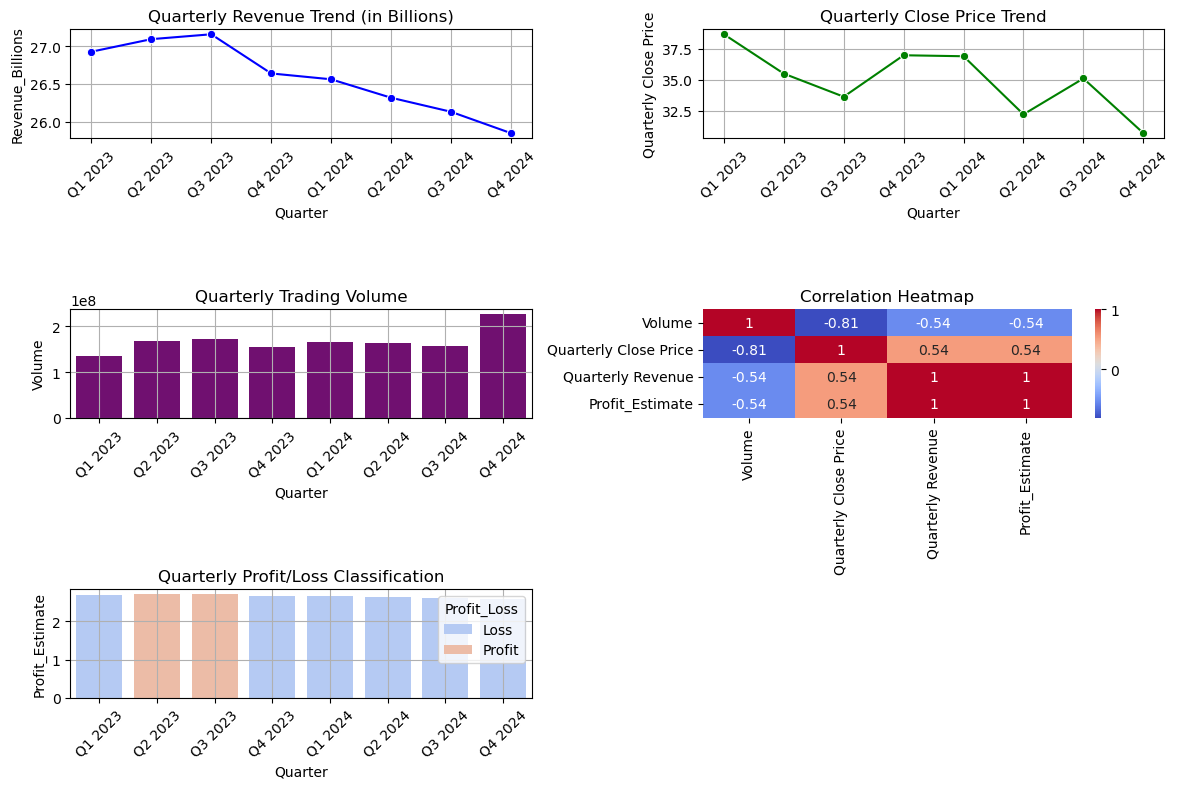

In [4]:
import pandas as pd  # Data handling
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Enhanced visualizations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # Model evaluation

# --------------------------- STEP 1: Load and Clean Data --------------------------- #

def load_and_clean_data(file_path):
    """Loads and preprocesses the Kraft Heinz dataset."""
    df = pd.read_csv(file_path)

    # Convert numeric values (remove commas and convert to float)
    df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
    df['Quarterly Close Price'] = df['Quarterly Close Price'].astype(float)
    df['Quarterly Revenue'] = df['Quarterly Revenue'].str.replace(',', '').astype(float)

    # Create additional features for deeper analysis
    df['Revenue_Billions'] = df['Quarterly Revenue'] / 1_000_000_000  # Convert revenue to billions
    df['Quarter_Num'] = range(1, len(df) + 1)  # Assign a numeric index to each quarter
    df['Revenue_QoQ_Change'] = df['Quarterly Revenue'].pct_change() * 100  # Revenue growth (%)
    df['Price_QoQ_Change'] = df['Quarterly Close Price'].pct_change() * 100  # Stock price change (%)
    df['Volume_QoQ_Change'] = df['Volume'].pct_change() * 100  # Volume change (%)
    df['PS_Ratio'] = (df['Quarterly Close Price'] * 1_000_000_000) / df['Quarterly Revenue']  # Price-to-sales ratio
    df['Profit_Estimate'] = df['Revenue_Billions'] * 0.1  # Assuming a 10% profit margin estimate

    return df

# --------------------------- STEP 2: Statistical & Correlation Analysis --------------------------- #

def summary_statistics(df):
    """Returns summary statistics for key metrics."""
    return df[['Volume', 'Quarterly Close Price', 'Revenue_Billions', 'Profit_Estimate']].describe()

def correlation_analysis(df):
    """Computes the correlation matrix between key financial metrics."""
    return df[['Volume', 'Quarterly Close Price', 'Quarterly Revenue', 'Profit_Estimate']].corr()

# --------------------------- STEP 3: Profit/Loss Classification --------------------------- #

def classify_profit_loss(df):
    """Classifies each quarter as Profit or Loss based on estimated profit trends."""
    df['Profit_Trend'] = df['Profit_Estimate'].diff()
    df['Profit_Loss'] = df['Profit_Trend'].apply(lambda x: 'Profit' if x > 0 else 'Loss')
    return df

# --------------------------- STEP 4: Enhanced Visualization --------------------------- #

def plot_trends(df):
    """Creates enhanced visualizations for revenue, stock price, volume trends, and profit trends."""
    plt.figure(figsize=(12, 8))
    
    # Line Plot for Revenue Trend
    plt.subplot(3, 2, 1)
    sns.lineplot(x=df['Quarter'], y=df['Revenue_Billions'], marker='o', color='blue')
    plt.title('Quarterly Revenue Trend (in Billions)')
    plt.xticks(rotation=45)
    plt.grid()
    
    # Line Plot for Stock Price Trend
    plt.subplot(3, 2, 2)
    sns.lineplot(x=df['Quarter'], y=df['Quarterly Close Price'], marker='o', color='green')
    plt.title('Quarterly Close Price Trend')
    plt.xticks(rotation=45)
    plt.grid()
    
    # Bar Chart for Volume Trend
    plt.subplot(3, 2, 3)
    sns.barplot(x=df['Quarter'], y=df['Volume'], color='purple')
    plt.title('Quarterly Trading Volume')
    plt.xticks(rotation=45)
    plt.grid()
    
    # Heatmap for Correlation Analysis
    plt.subplot(3, 2, 4)
    sns.heatmap(df[['Volume', 'Quarterly Close Price', 'Quarterly Revenue', 'Profit_Estimate']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    
    # Bar Plot for Profit/Loss Classification
    plt.subplot(3, 2, 5)
    sns.barplot(x=df['Quarter'], y=df['Profit_Estimate'], hue=df['Profit_Loss'], palette='coolwarm')
    plt.title('Quarterly Profit/Loss Classification')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.tight_layout()
    plt.show()

# --------------------------- STEP 5: Main Execution --------------------------- #

if __name__ == "__main__":
    file_path = "C:\\Users\\sapna\\OneDrive - The University of Colorado Denver\\Spring 2025\\Academics\\Computing\\Final Project\\Group_Project_Data_Set.csv"
    df = load_and_clean_data(file_path)
    df = classify_profit_loss(df)

    print("Summary Statistics:")
    print(summary_statistics(df))
    print("\nCorrelation Analysis:")
    print(correlation_analysis(df))

    # Generate enhanced visualizations including profit/loss classification
    plot_trends(df)



Profit Prediction R² Score: 0.8722
Summary Statistics:
             Volume  Quarterly Close Price  Revenue_Billions  Profit_Estimate
count  8.000000e+00               8.000000          8.000000         8.000000
mean   1.676281e+08              34.966250         26.585125         2.658513
std    2.611276e+07               2.652072          0.469005         0.046900
min    1.349159e+08              30.710000         25.846000         2.584600
25%    1.563601e+08              33.285000         26.270250         2.627025
50%    1.644707e+08              35.305000         26.601000         2.660100
75%    1.681267e+08              36.920000         26.970750         2.697075
max    2.258875e+08              38.670000         27.161000         2.716100

Correlation Analysis:
                         Volume  Quarterly Close Price  Quarterly Revenue  \
Volume                 1.000000              -0.813551          -0.543164   
Quarterly Close Price -0.813551               1.000000           

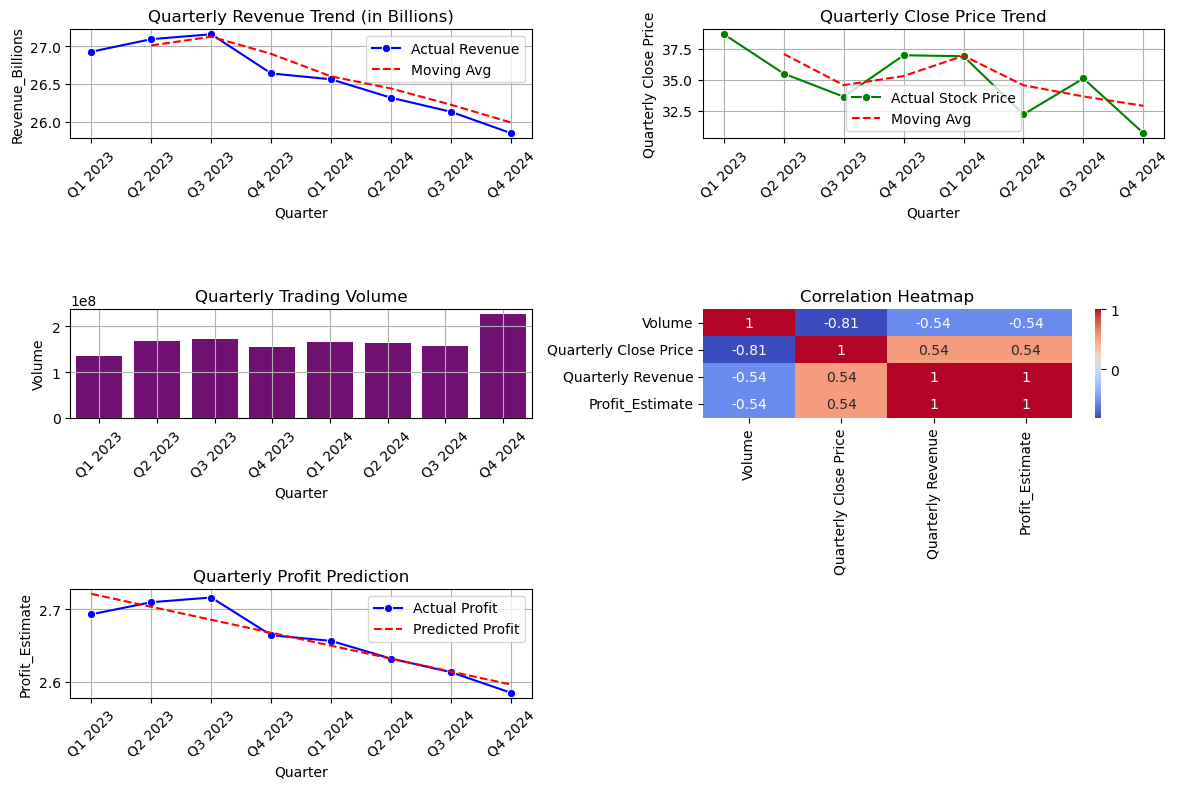

In [5]:
import pandas as pd  # Data handling
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Enhanced visualizations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # Model evaluation

# --------------------------- STEP 1: Load and Clean Data --------------------------- #

def load_and_clean_data(file_path):
    """Loads and preprocesses the Kraft Heinz dataset."""
    df = pd.read_csv(file_path)

    # Convert numeric values (remove commas and convert to float)
    df['Volume'] = df['Volume'].str.replace(',', '').astype(float)
    df['Quarterly Close Price'] = df['Quarterly Close Price'].astype(float)
    df['Quarterly Revenue'] = df['Quarterly Revenue'].str.replace(',', '').astype(float)

    # Create additional features for deeper analysis
    df['Revenue_Billions'] = df['Quarterly Revenue'] / 1_000_000_000  # Convert revenue to billions
    df['Quarter_Num'] = range(1, len(df) + 1)  # Assign a numeric index to each quarter
    df['Revenue_QoQ_Change'] = df['Quarterly Revenue'].pct_change() * 100  # Revenue growth (%)
    df['Price_QoQ_Change'] = df['Quarterly Close Price'].pct_change() * 100  # Stock price change (%)
    df['Volume_QoQ_Change'] = df['Volume'].pct_change() * 100  # Volume change (%)
    df['PS_Ratio'] = (df['Quarterly Close Price'] * 1_000_000_000) / df['Quarterly Revenue']  # Price-to-sales ratio
    df['Profit_Estimate'] = df['Revenue_Billions'] * 0.1  # Assuming a 10% profit margin estimate

    # Moving Averages for smoothing trends
    df['Revenue_MA'] = df['Revenue_Billions'].rolling(window=2).mean()
    df['Stock_Price_MA'] = df['Quarterly Close Price'].rolling(window=2).mean()
    df['Profit_MA'] = df['Profit_Estimate'].rolling(window=2).mean()

    return df

# --------------------------- STEP 2: Statistical & Correlation Analysis --------------------------- #

def summary_statistics(df):
    """Returns summary statistics for key metrics."""
    return df[['Volume', 'Quarterly Close Price', 'Revenue_Billions', 'Profit_Estimate']].describe()

def correlation_analysis(df):
    """Computes the correlation matrix between key financial metrics."""
    return df[['Volume', 'Quarterly Close Price', 'Quarterly Revenue', 'Profit_Estimate']].corr()

# --------------------------- STEP 3: Profit/Loss Classification --------------------------- #

def classify_profit_loss(df):
    """Classifies each quarter as Profit or Loss based on estimated profit trends."""
    df['Profit_Trend'] = df['Profit_Estimate'].diff()
    df['Profit_Loss'] = df['Profit_Trend'].apply(lambda x: 'Profit' if x > 0 else 'Loss')
    return df

# --------------------------- STEP 4: Predictive Modeling for Profit Estimation --------------------------- #

def predict_profit(df):
    """Predicts future profit trends using linear regression."""
    X = df[['Quarter_Num']]
    y_profit = df['Profit_Estimate']
    profit_model = LinearRegression()
    profit_model.fit(X, y_profit)
    df['Predicted_Profit'] = profit_model.predict(X)

    # Model Performance Evaluation
    profit_r2 = r2_score(y_profit, df['Predicted_Profit'])
    print(f"\nProfit Prediction R² Score: {profit_r2:.4f}")
    
    return df

# --------------------------- STEP 5: Enhanced Visualization --------------------------- #

def plot_trends(df):
    """Creates enhanced visualizations for revenue, stock price, volume trends, and profit trends."""
    plt.figure(figsize=(12, 8))
    
    # Line Plot for Revenue Trend with Moving Average
    plt.subplot(3, 2, 1)
    sns.lineplot(x=df['Quarter'], y=df['Revenue_Billions'], marker='o', color='blue', label='Actual Revenue')
    sns.lineplot(x=df['Quarter'], y=df['Revenue_MA'], linestyle='dashed', color='red', label='Moving Avg')
    plt.title('Quarterly Revenue Trend (in Billions)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    
    # Line Plot for Stock Price Trend with Moving Average
    plt.subplot(3, 2, 2)
    sns.lineplot(x=df['Quarter'], y=df['Quarterly Close Price'], marker='o', color='green', label='Actual Stock Price')
    sns.lineplot(x=df['Quarter'], y=df['Stock_Price_MA'], linestyle='dashed', color='red', label='Moving Avg')
    plt.title('Quarterly Close Price Trend')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    
    # Bar Chart for Volume Trend
    plt.subplot(3, 2, 3)
    sns.barplot(x=df['Quarter'], y=df['Volume'], color='purple')
    plt.title('Quarterly Trading Volume')
    plt.xticks(rotation=45)
    plt.grid()
    
    # Heatmap for Correlation Analysis
    plt.subplot(3, 2, 4)
    sns.heatmap(df[['Volume', 'Quarterly Close Price', 'Quarterly Revenue', 'Profit_Estimate']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    
    # Profit Prediction Trend
    plt.subplot(3, 2, 5)
    sns.lineplot(x=df['Quarter'], y=df['Profit_Estimate'], marker='o', color='blue', label='Actual Profit')
    sns.lineplot(x=df['Quarter'], y=df['Predicted_Profit'], linestyle='dashed', color='red', label='Predicted Profit')
    plt.title('Quarterly Profit Prediction')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

# --------------------------- STEP 6: Main Execution --------------------------- #

if __name__ == "__main__":
    file_path = "C:\\Users\\sapna\\OneDrive - The University of Colorado Denver\\Spring 2025\\Academics\\Computing\\Final Project\\Group_Project_Data_Set.csv"
    df = load_and_clean_data(file_path)
    df = classify_profit_loss(df)
    df = predict_profit(df)

    print("Summary Statistics:")
    print(summary_statistics(df))
    print("\nCorrelation Analysis:")
    print(correlation_analysis(df))

    # Generate enhanced visualizations including profit/loss classification and predictions
    plot_trends(df)
